

# <span style="color:orange"> Segmenting and Clustering Neighborhoods in Toronto</span>

In [92]:
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup

## Scraping data from Wikipedia page with BeautifulSoup package and putting results into a Pandas datafram

In [93]:
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, "lxml")
#print(soup.prettify())
soup.title.string
right_table=soup.find('table', class_='wikitable sortable')
right_table

A=[]
B=[]
C=[]

for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==3:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))

        
df=pd.DataFrame(A,columns=['Postal Code'])
df['Borough_Code']=B
df['Neighborhood']=C

## Result of scraping as new Pandas dataframe

In [94]:
df

,Postal Code,Borough_Code,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,Not assigned
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"


## Dropping rows where Borough is "Not assigned"
## First checking how many rows have Borough "Not assigned" -- here 77 out of 180

In [95]:
df.groupby(['Borough_Code']).size()

Borough_Code
Central Toronto
     9 
Downtown Toronto
    19
East Toronto
        5 
East York
           5 
Etobicoke
           12
Mississauga
         1 
North York
          24
Not assigned
        77
Scarborough
         17
West Toronto
        6 
York
                5 
dtype: int64

In [96]:
df = df[~df.Borough_Code.str.contains("Not assigned")]

In [6]:
df

,Postal Code,Borough_Code,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
8,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
9,M1B,Scarborough,"Malvern, Rouge"
11,M3B,North York,Don Mills
12,M4B,East York,"Parkview Hill, Woodbine Gardens"
13,M5B,Downtown Toronto,"Garden District, Ryerson"


## Use the agg() function from Panda’s dataFrame objects to combine lines with same Postal Code and concatenate the neighborhood string values together

### Also removing extra "\n" end from end of rows

### And resetting the index

In [97]:
df.groupby(['Postal Code','Borough_Code'])['Neighborhood'].apply(','.join).reset_index()
df['Neighborhood'] = df['Neighborhood'].str.rstrip('\n')
df['Postal Code'] = df['Postal Code'].str.rstrip('\n')
df['Borough_Code'] = df['Borough_Code'].str.rstrip('\n')
df.reset_index(drop= True, inplace = True)
df

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,Postal Code,Borough_Code,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


## Checking for any remaining "Not assigned" values in Neighborhood

In [98]:
df.loc[df.Neighborhood == 'Not assigned']

,Postal Code,Borough_Code,Neighborhood


In [99]:
df.shape

(103, 3)

# <span style="color:orange">  Part Two <span>

## Geocoding

In [100]:
!conda install -c conda-forge geocoder --yes
import geocoder # import geocoder

Solving environment: done

# All requested packages already installed.



In [103]:
import numpy as np

# initialize your variable to None
lat_lng_coords = None
test = True

codes = df['Postal Code']
df["latitude"] = ""
df["longitude"] = ""

# initialize your variable to None
lat_lng_coords = None



# loop until you get the coordinates

for i in range(0, len(df)):
    g = geocoder.arcgis(codes[i])
    lat_lng_coords = g.latlng
    df.latitude[i] = lat_lng_coords[:1]
    df.longitude[i] = lat_lng_coords[1:]
    print(i, df.latitude[i], df.longitude[i])
        

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-c

0 [43.75293455500008] [-79.33564142299997]
1 [43.72810248500008] [-79.31188987099995]
2 [43.65096410900003] [-79.35304116399999]
3 [43.723265465000054] [-79.45121077799996]
4 [43.66179000000005] [-79.38938999999993]
5 [43.66748067300006] [-79.52895286499995]
6 [43.80862623100006] [-79.18991284599997]
7 [43.74890000000005] [-79.35721999999998]
8 [43.70719267700008] [-79.31152927299996]
9 [43.65749059800004] [-79.37752923699998]
10 [43.70727872700007] [-79.44750009299997]
11 [43.65002250300006] [-79.55408903099999]
12 [43.78577865700004] [-79.15736763799998]
13 [43.72214339800007] [-79.35202341799999]
14 [43.68974004200004] [-79.30850701899999]
15 [43.65173364700007] [-79.37555358799995]
16 [43.69172991700003] [-79.43001279899994]
17 [43.637813150000056] [-79.57648363299995]
18 [43.76580607300008] [-79.18528434099994]
19 [43.67814827600006] [-79.29534930999995]
20 [43.645195888000046] [-79.37385548899994]
21 [43.68911756600005] [-79.45065043699998]
22 [43.77154467100007] [-79.21813521299

## Look at df to confirm the latitude and longitude are now in the database

In [104]:
df.head()

,Postal Code,Borough_Code,Neighborhood,latitude,longitude
0,M3A,North York,Parkwoods,[43.75293455500008],[-79.33564142299997]
1,M4A,North York,Victoria Village,[43.72810248500008],[-79.31188987099995]
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",[43.65096410900003],[-79.35304116399999]
3,M6A,North York,"Lawrence Manor, Lawrence Heights",[43.723265465000054],[-79.45121077799996]
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",[43.66179000000005],[-79.38938999999993]


In [105]:
df['latitude'] = df['latitude'].str[0]


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [106]:
df['longitude'] = df['longitude'].str[0]

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [107]:
df.head()

,Postal Code,Borough_Code,Neighborhood,latitude,longitude
0,M3A,North York,Parkwoods,43.752935,-79.335641
1,M4A,North York,Victoria Village,43.728102,-79.311890
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.650964,-79.353041
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.723265,-79.451211
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.661790,-79.389390


# <span style="color:orange">  Part Three: Explore and cluster the neighborhoods in Toronto <span>

In [ ]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs 
%matplotlib inline

## Clustering by latitude and longitude

In [108]:
X = df[['latitude', 'longitude']]

In [109]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

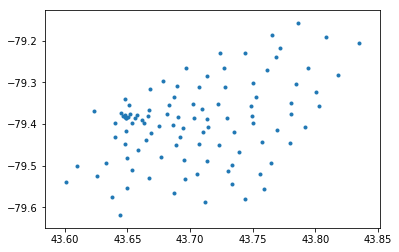

In [110]:
plt.scatter(X['latitude'], X['longitude'], marker='.')

In [111]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [112]:
y_kmeans = k_means.predict(X)
k_means_labels = k_means.labels_
k_means_labels

array([3, 2, 0, 3, 0, 1, 2, 3, 0, 0, 3, 1, 2, 0, 0, 0, 3, 1, 2, 0, 0, 3,
       2, 0, 0, 0, 2, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 0,
       2, 3, 1, 0, 0, 1, 1, 2, 3, 1, 0, 3, 1, 1, 2, 3, 1, 3, 3, 1, 1, 2,
       3, 3, 0, 1, 1, 2, 3, 3, 0, 0, 1, 1, 2, 0, 0, 1, 2, 0, 0, 2, 0, 0,
       1, 1, 2, 0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 1, 1], dtype=int32)

In [113]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 43.66735184, -79.37711648],
       [ 43.68219808, -79.52780681],
       [ 43.76536333, -79.25124848],
       [ 43.74460532, -79.40998913]])

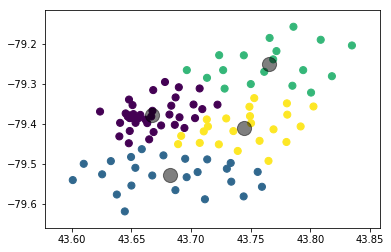

In [114]:
plt.scatter(X['latitude'], X['longitude'], c=y_kmeans, s=50, cmap='viridis')

centers = k_means_cluster_centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Getting Folium and Geopy 

In [25]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-1.22.0               |     pyh9f0ad1d_0          63 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

    geographiclib: 1.50-py_0           conda-forge
    geopy:         1.22.0-pyh9f0ad1d_0 conda-forge


geopy-1.22.0         | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

## Packa

## Setting up Foursquare API

In [115]:
CLIENT_ID = 'DTCSBRDEARI5YPHBKTHXXHA2SKQKS0FEOQK0J2L13MQ3T2VE' # your Foursquare ID
CLIENT_SECRET = 'KK20BPB5FXZTBKFIWE0MXLJUS4A3QDZDKK1TY13PHOKDH5DI' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DTCSBRDEARI5YPHBKTHXXHA2SKQKS0FEOQK0J2L13MQ3T2VE
CLIENT_SECRET:KK20BPB5FXZTBKFIWE0MXLJUS4A3QDZDKK1TY13PHOKDH5DI


## Subsetting the dataset to only boroughs with "Toronto" in the name

In [116]:
dft = df[df['Borough_Code'].str.contains('Toronto')]
dft.reset_index(drop= True, inplace = True)
dft

,Postal Code,Borough_Code,Neighborhood,latitude,longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.650964,-79.353041
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.661790,-79.389390
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657491,-79.377529
3,M5C,Downtown Toronto,St. James Town,43.651734,-79.375554
4,M4E,East Toronto,The Beaches,43.678148,-79.295349
5,M5E,Downtown Toronto,Berczy Park,43.645196,-79.373855
6,M5G,Downtown Toronto,Central Bay Street,43.656072,-79.385653
7,M6G,Downtown Toronto,Christie,43.668602,-79.420387
8,M5H,Downtown Toronto,"Richmond, Adelaide, King",43.650542,-79.384116
9,M6H,West Toronto,"Dufferin, Dovercourt Village",43.664910,-79.438664


## Query for "coffee" around latitude and longitude of Postal Code M1A in the database

In [117]:
search_query = 'Coffee'
radius = 500
latitude = dft.latitude[0]
longitude = dft.longitude[0]


In [118]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=DTCSBRDEARI5YPHBKTHXXHA2SKQKS0FEOQK0J2L13MQ3T2VE&client_secret=KK20BPB5FXZTBKFIWE0MXLJUS4A3QDZDKK1TY13PHOKDH5DI&ll=43.65096410900003,-79.35304116399999&v=20180604&query=Coffee&radius=500&limit=30'

In [119]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ee10e69668a7c209c54c896'},
 'response': {'venues': [{'id': '58bdc3a23ef0f629212f1f70',
    'name': 'Arena Coffee Bar',
    'location': {'address': '15 Tank House Lane',
     'lat': 43.65028,
     'lng': -79.35886,
     'labeledLatLngs': [{'label': 'display',
       'lat': 43.65028,
       'lng': -79.35886}],
     'distance': 474,
     'postalCode': 'M5A 3C4',
     'cc': 'CA',
     'city': 'Toronto',
     'state': 'ON',
     'country': 'Canada',
     'formattedAddress': ['15 Tank House Lane',
      'Toronto ON M5A 3C4',
      'Canada']},
    'categories': [{'id': '4bf58dd8d48988d1e0931735',
      'name': 'Coffee Shop',
      'pluralName': 'Coffee Shops',
      'shortName': 'Coffee Shop',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1591807664',
    'hasPerk': False},
   {'id': '4adb58f7f964a520412621e3',
    'name': "Balzac's Coffee",
    '

## Get relevant part of JSON results and transform it into a *pandas* dataframe

In [120]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}]",False,58bdc3a23ef0f629212f1f70,15 Tank House Lane,CA,Toronto,Canada,NaN,474,"[15 Tank House Lane, Toronto ON M5A 3C4, Canada]","[{'label': 'display', 'lat': 43.65028, 'lng': -79.35886}]",43.650280,-79.358860,M5A 3C4,ON,Arena Coffee Bar,v-1591807664
1,"[{'id': '4bf58dd8d48988d1e0931735', 'name': 'Coffee Shop', 'pluralName': 'Coffee Shops', 'shortName': 'Coffee Shop', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_', 'suffix': '.png'}, 'primary': True}]",False,4adb58f7f964a520412621e3,1 Trinity Street,CA,Toronto,Canada,at Distillery Ln.,508,"[1 Trinity Street (at Distillery Ln.), Toronto ON M5A 3C4, Canada]","[{'label': 'display', 'lat': 43.649797141476185, 'lng': -79.35914199644303}]",43.649797,-79.359142,M5A 3C4,ON,Balzac's Coffee,v-1591807664


In [121]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Arena Coffee Bar,Coffee Shop,15 Tank House Lane,CA,Toronto,Canada,NaN,474,"[15 Tank House Lane, Toronto ON M5A 3C4, Canada]","[{'label': 'display', 'lat': 43.65028, 'lng': -79.35886}]",43.650280,-79.358860,M5A 3C4,ON,58bdc3a23ef0f629212f1f70
1,Balzac's Coffee,Coffee Shop,1 Trinity Street,CA,Toronto,Canada,at Distillery Ln.,508,"[1 Trinity Street (at Distillery Ln.), Toronto ON M5A 3C4, Canada]","[{'label': 'display', 'lat': 43.649797141476185, 'lng': -79.35914199644303}]",43.649797,-79.359142,M5A 3C4,ON,4adb58f7f964a520412621e3


## Two coffee shops found in Postal Code M1A

In [122]:
dataframe_filtered.name

0    Arena Coffee Bar
1    Balzac's Coffee 
Name: name, dtype: object

## Create a map of the coffee shops relative to the center of Postal Code M1A

In [123]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the center of Postal Code M1A
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Center of M1A',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

# add the coffee shops as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

## Explore a Arena Coffee Bar

In [124]:
venue_id = '58bdc3a23ef0f629212f1f70' #ID for Arena Coffee Bar
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/58bdc3a23ef0f629212f1f70?client_id=DTCSBRDEARI5YPHBKTHXXHA2SKQKS0FEOQK0J2L13MQ3T2VE&client_secret=KK20BPB5FXZTBKFIWE0MXLJUS4A3QDZDKK1TY13PHOKDH5DI&v=20180604'

In [125]:
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'price', 'likes', 'dislike', 'ok', 'allowMenuUrlEdit', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'seasonalHours', 'pageUpdates', 'inbox', 'attributes', 'bestPhoto'])


{'id': '58bdc3a23ef0f629212f1f70',
 'name': 'Arena Coffee Bar',
 'contact': {},
 'location': {'address': '15 Tank House Lane',
  'lat': 43.65028,
  'lng': -79.35886,
  'labeledLatLngs': [{'label': 'display', 'lat': 43.65028, 'lng': -79.35886}],
  'postalCode': 'M5A 3C4',
  'cc': 'CA',
  'city': 'Toronto',
  'state': 'ON',
  'country': 'Canada',
  'formattedAddress': ['15 Tank House Lane', 'Toronto ON M5A 3C4', 'Canada']},
 'canonicalUrl': 'https://foursquare.com/v/arena-coffee-bar/58bdc3a23ef0f629212f1f70',
 'categories': [{'id': '4bf58dd8d48988d1e0931735',
   'name': 'Coffee Shop',
   'pluralName': 'Coffee Shops',
   'shortName': 'Coffee Shop',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
    'suffix': '.png'},
   'primary': True}],
 'verified': False,
 'stats': {'tipCount': 1},
 'price': {'tier': 1, 'message': 'Cheap', 'currency': '$'},
 'likes': {'count': 2,
  'groups': [{'type': 'others',
    'count': 2,
    'items': [{'id': '12260861',
      'fi

## Find ratings for Arena Coffee Bar

In [126]:
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')


This venue has not been rated yet.


## Get the number of tips for Arena Coffee Bar

In [127]:
result['response']['venue']['tips']['count']

1

## Create URL and send GET request to get tips for Arena Coffee Bar

In [128]:
limit = 15
url = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION, limit)

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ee10ec83639536919830a45'},
 'response': {'tips': {'count': 1,
   'items': [{'id': '5a4865767269fe5b87443ad7',
     'createdAt': 1514694006,
     'text': 'The Rocket was out of this world!',
     'type': 'user',
     'canonicalUrl': 'https://foursquare.com/item/5a4865767269fe5b87443ad7',
     'lang': 'en',
     'likes': {'count': 0, 'groups': []},
     'logView': True,
     'agreeCount': 0,
     'disagreeCount': 0,
     'todo': {'count': 0},
     'user': {'id': '465852477',
      'firstName': 'Megan',
      'lastName': 'S',
      'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
       'suffix': '/465852477_rC2PtHw5_QqQirFIZNU-LseIBH_YVEylnHBQsEc16LBGRxtxkzns7iPGCECiVj1nVDW9D1o9v.jpg'}},
     'authorInteractionType': 'liked'}]}}}

## Format column width and display all tips

In [129]:
tips = results['response']['tips']['items']

tip = results['response']['tips']['items'][0]
tip.keys()

pd.set_option('display.max_colwidth', -1)

tips_df = json_normalize(tips) # json normalize tips

# columns to keep
filtered_columns = ['text', 'agreeCount', 'disagreeCount', 'id', 'user.firstName', 'user.lastName', 'user.id']
tips_filtered = tips_df.loc[:, filtered_columns]

# display tips
tips_filtered

,text,agreeCount,disagreeCount,id,user.firstName,user.lastName,user.id
0,The Rocket was out of this world!,0,0,5a4865767269fe5b87443ad7,Megan,S,465852477


## This venue has only one review, from user Megan

## Search Foursquare User "Megan" and get user info

In [130]:
user_id = '465852477' # user ID with most agree counts and complete profile
ACCESS_TOKEN = 'ULKPOH5S1VI11KGBN3JTQIIWRC3GRYQ0RK1V4ENTS51M1GRP'

url = 'https://api.foursquare.com/v2/users/{}?client_id={}&client_secret={}&oauth_token={}&v={}'.format(user_id, CLIENT_ID, CLIENT_SECRET, ACCESS_TOKEN, VERSION) # define URL

# send GET request
results = requests.get(url).json()
user_data = results['response']['user']

# display features associated with user
user_data.keys()

dict_keys(['id', 'firstName', 'lastName', 'gender', 'canonicalUrl', 'photo', 'friends', 'tips', 'homeCity', 'bio', 'contact', 'photos', 'checkinPings', 'pings', 'type', 'mayorships', 'checkins', 'lists', 'blockedStatus', 'lenses'])

In [131]:
print('First Name: ' + user_data['firstName'])
print('Last Name: ' + user_data['lastName'])
print('Home City: ' + user_data['homeCity'])

First Name: Megan
Last Name: Sosnosky
Home City: Toronto, ON


In [132]:
user_data['tips']

{'count': 1}

## User Megan has only one tip and has no friends on Foursquare

In [133]:
user_friends = json_normalize(user_data['friends']['groups'][0]['items'])
user_friends

""


In [134]:
user_data

{'id': '465852477',
 'firstName': 'Megan',
 'lastName': 'Sosnosky',
 'gender': 'female',
 'canonicalUrl': 'https://foursquare.com/user/465852477',
 'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
  'suffix': '/465852477_rC2PtHw5_QqQirFIZNU-LseIBH_YVEylnHBQsEc16LBGRxtxkzns7iPGCECiVj1nVDW9D1o9v.jpg'},
 'friends': {'count': 0,
  'groups': [{'type': 'friends',
    'name': 'Mutual friends',
    'count': 0,
    'items': []},
   {'type': 'others', 'name': 'Other friends', 'count': 0, 'items': []}]},
 'tips': {'count': 1},
 'homeCity': 'Toronto, ON',
 'bio': '',
 'contact': {},
 'photos': {'count': 0, 'items': []},
 'checkinPings': 'off',
 'pings': False,
 'type': 'user',
 'mayorships': {'count': 0, 'items': []},
 'checkins': {'count': 0, 'items': []},
 'lists': {'count': 2,
  'groups': [{'type': 'created', 'count': 0, 'items': []},
   {'type': 'followed', 'count': 0, 'items': []},
   {'type': 'yours',
    'count': 2,
    'items': [{'id': '465852477/todos',
      'name': "Megan's Save

In [135]:
Image(url='https://fastly.4sqi.net/img/user/300x300/465852477_rC2PtHw5_QqQirFIZNU-LseIBH_YVEylnHBQsEc16LBGRxtxkzns7iPGCECiVj1nVDW9D1o9v.jpg')

## Explore a location - Arena Coffee Bar

In [136]:
latitude = 43.650280
longitude = -79.358860
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
results = requests.get(url).json()

In [137]:
import requests
'There are {} venues around Arena Coffee Bar.'.format(len(results['response']['groups'][0]['items']))

'There are 30 venues around Arena Coffee Bar.'

In [138]:
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '4ad4c05ef964a520bff620e3',
  'name': 'The Distillery Historic District',
  'location': {'address': 'btwn Front, Cherry, Gardiner & Parliament',
   'lat': 43.65024435658077,
   'lng': -79.35932278633118,
   'labeledLatLngs': [{'label': 'display',
     'lat': 43.65024435658077,
     'lng': -79.35932278633118}],
   'distance': 37,
   'postalCode': 'M5A 3C4',
   'cc': 'CA',
   'city': 'Toronto',
   'state': 'ON',
   'country': 'Canada',
   'formattedAddress': ['btwn Front, Cherry, Gardiner & Parliament',
    'Toronto ON M5A 3C4',
    'Canada']},
  'categories': [{'id': '4deefb944765f83613cdba6e',
    'name': 'Historic Site',
    'pluralName': 'Historic Sites',
    'shortName': 'Historic Site',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/historicsite_',
     'suffix': '.png'},
    'primary': Tr

## Get venue locations from around Arena Coffee Bar

In [139]:
dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,The Distillery Historic District,Historic Site,"btwn Front, Cherry, Gardiner & Parliament",CA,Toronto,Canada,NaN,37,"[btwn Front, Cherry, Gardiner & Parliament, Toronto ON M5A 3C4, Canada]","[{'label': 'display', 'lat': 43.65024435658077, 'lng': -79.35932278633118}]",43.650244,-79.359323,NaN,M5A 3C4,ON,4ad4c05ef964a520bff620e3
1,SOMA chocolatemaker,Chocolate Shop,"55 Mill Street, Unit #48",CA,Toronto,Canada,The Distillery District,70,"[55 Mill Street, Unit #48 (The Distillery District), Toronto ON M5A 3C4, Canada]","[{'label': 'display', 'lat': 43.65062222570758, 'lng': -79.35812684032683}]",43.650622,-79.358127,NaN,M5A 3C4,ON,4b0978e1f964a520cd1723e3
2,Arvo,Coffee Shop,17 Gristmill Ln,CA,Toronto,Canada,at Parliament St,210,"[17 Gristmill Ln (at Parliament St), Toronto ON M5A 3R6, Canada]","[{'label': 'display', 'lat': 43.64996280366945, 'lng': -79.36144178325522}]",43.649963,-79.361442,Distillery,M5A 3R6,ON,57cd9d20498e6ab8342980e2
3,Distillery Sunday Market,Farmers Market,1 Trinity St,CA,Toronto,Canada,NaN,240,"[1 Trinity St, Toronto ON, Canada]","[{'label': 'display', 'lat': 43.650074989330655, 'lng': -79.36183171318665}]",43.650075,-79.361832,NaN,NaN,ON,4c3e1eaa6faac9b66dc60d76
4,Cacao 70,Dessert Shop,28 Gristmill Lane,CA,Toronto,Canada,NaN,151,"[28 Gristmill Lane, Toronto ON M5A 3C4, Canada]","[{'label': 'display', 'lat': 43.650066694561666, 'lng': -79.36072263183006}]",43.650067,-79.360723,NaN,M5A 3C4,ON,5653a96f498e99c91027730b
5,Spotify,Tech Startup,179 John St.,CA,Toronto,Canada,NaN,40,"[179 John St., Toronto ON M5A 3C4, Canada]","[{'label': 'display', 'lat': 43.64991916262922, 'lng': -79.35886149447444}]",43.649919,-79.358861,NaN,M5A 3C4,ON,551128d4498e2e50d8f03c5b
6,Young Centre for the Performing Arts,Performing Arts Venue,50 Tank House Ln.,CA,Toronto,Canada,at Cherry St.,118,"[50 Tank House Ln. (at Cherry St.), Toronto ON M5A 3C4, Canada]","[{'label': 'display', 'lat': 43.65082466432163, 'lng': -79.35759324240415}]",43.650825,-79.357593,NaN,M5A 3C4,ON,4bb68165f562ef3b88483097
7,Cluny Bistro & Boulangerie,French Restaurant,35 Tank House Lane,CA,Toronto,Canada,NaN,87,"[35 Tank House Lane, Toronto ON M5A 3C4, Canada]","[{'label': 'display', 'lat': 43.650565116074695, 'lng': -79.35784287026658}]",43.650565,-79.357843,"Distillery District, Toronto, ON",M5A 3C4,ON,53a22c92498ec91fda7ce133
8,Balzac's Coffee,Coffee Shop,1 Trinity Street,CA,Toronto,Canada,at Distillery Ln.,58,"[1 Trinity Street (at Distillery Ln.), Toronto ON M5A 3C4, Canada]","[{'label': 'display', 'lat': 43.649797141476185, 'lng': -79.35914199644303}]",43.649797,-79.359142,NaN,M5A 3C4,ON,4adb58f7f964a520412621e3
9,Caffe Furbo,Café,12 case goods lane,CA,Toronto,Canada,NaN,34,"[12 case goods lane, Toronto ON M5A 3C4, Canada]","[{'label': 'display', 'lat': 43.649969882303814, 'lng': -79.35884946388191}]",43.649970,-79.358849,NaN,M5A 3C4,ON,4d84d98181fdb1f7d4a704c0


## Visualize these locations on the map around Arena Coffee Bar

In [140]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around Ecco


# add Arena Coffee Bar as a red circle mark
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    popup='Arena Coffee Bar',
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(venues_map)


# add popular spots to the map as blue circle markers
for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(venues_map)

# display map
venues_map

## Explore Trending Venues Around Arena Coffee Bar with Foursquare "trending" endpoint

In [141]:
url = 'https://api.foursquare.com/v2/venues/trending?client_id={}&client_secret={}&ll={},{}&v={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION)

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ee10e77cb82360791777845'},
 'response': {'venues': []}}

In [142]:
if len(results['response']['venues']) == 0:
    trending_venues_df = 'No trending venues are available at the moment!'
    
else:
    trending_venues = results['response']['venues']
    trending_venues_df = json_normalize(trending_venues)

    # filter columns
    columns_filtered = ['name', 'categories'] + ['location.distance', 'location.city', 'location.postalCode', 'location.state', 'location.country', 'location.lat', 'location.lng']
    trending_venues_df = trending_venues_df.loc[:, columns_filtered]

    # filter the category for each row
    trending_venues_df['categories'] = trending_venues_df.apply(get_category_type, axis=1)
    
trending_venues_df

'No trending venues are available at the moment!'

## Query finds no trending venues